In [15]:
# 필요 라이브러리 설치
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.cluster import KMeans

# functions.py 파일의 함수들 가져오기
from functions import *

### 과제 1 : 수입 분류 문제

수입이 50K 이상인 사람들을 분류해봅시다 !

이번 과제는 Kaggle의 Adult income 데이터셋을 활용하도록 구성되었습니다. (https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)


[데이터 필드 설명]
- `age` -> 나이
- `workclass` -> 직업군
- `fnlwgt` -> 응답자가 조사에서 대표하는 인구 수 
- `education` -> 교육 수준
- `education-num` -> 교육 연수
- `marital-status` -> 결혼 상태
- `occupation` -> 직업
- `Relationship` -> 가족 관계
- `race` -> 인종
- `gender` -> 성별
- `capital-gain` -> 자본 이득
- `capital-loss` -> 자본 손실
- `hours-per-week` -> 주당 근무 시간
- `native-country` -> 출신 국가
- `class` -> 소득 수준 (target variable), 50K 이상 or 미만으로 분류

#### (1) 데이터 확인 및 간단한 전처리

- 원본 데이터의 컬럼 중 native-country, relationship, workclass 열을 제외한 나머지를 x 변수로 사용했습니다.

In [17]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
X,y = preprocess_adult_data(data)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### (2) 모델 학습 및 성능 평가

In [19]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# XGBoost
xgb_model = XGBClassifier(random_state=42)

models = {
    'Decision Tree': tree_model,
    'XGBoost': xgb_model
}


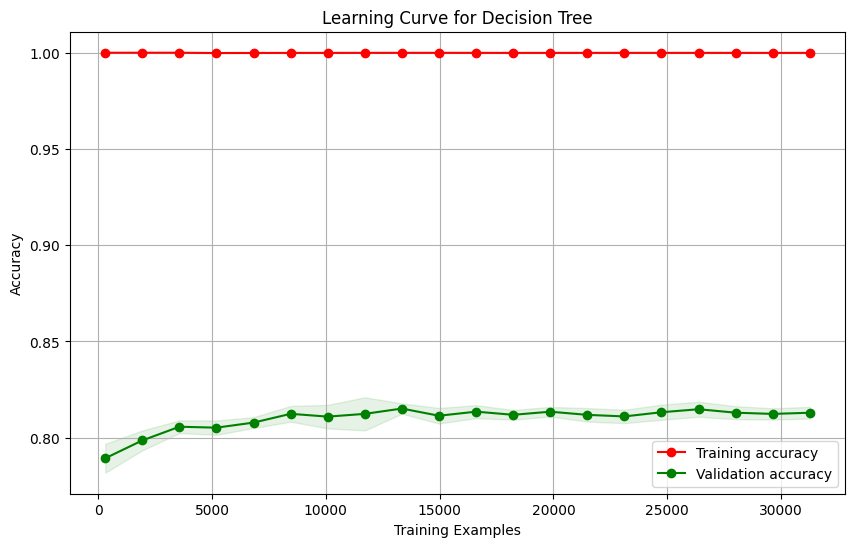

Decision Tree - Training Accuracy: 0.9999, Test Accuracy: 0.8147


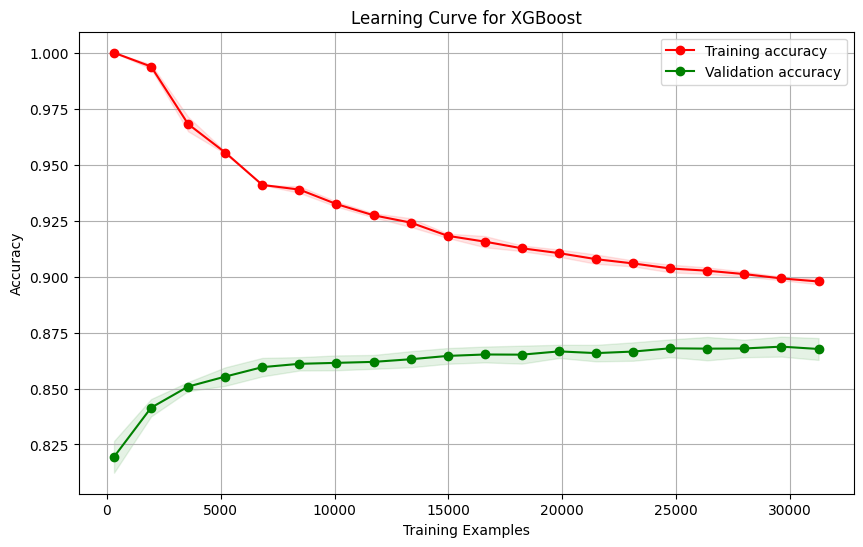

XGBoost - Training Accuracy: 0.8933, Test Accuracy: 0.8689


In [20]:
for model_name, model in models.items():
    """
    TODO : models에 포함된 모델에 대해 학습 및 평가를 수행하는 코드를 작성해주세요.
    (1) train 데이터를 사용하여 모델을 학습합니다.
    (2) 학습된 모델을 사용하여 train/test 데이터에 대해 예측을 수행하고 정확도 (sklearn의 accuracy_socre 사용)를 출력합니다.
    """
    # plot_learning_curve 를 사용해 시각화
    plot_learning_curve(model, X_train, y_train, model_name)

    # Fill here : 모델 학습 및 예측
    # train 데이터를 활용해 모델을 학습시킵니다.
    model.fit(X_train, y_train)

    # 학습된 모델을 활용해 train, test 데이터에 대해 각각 예측을 진행해주세요.
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Fill here : 정확도 출력 
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

### 과제 2 : K-Means를 활용한 군집화

Mall_Customers 데이터를 활용해 고객을 군집화해봅시다!

[데이터 필드 설명]
- `CustomerID` -> 고객 ID
- `Gender` -> 성별
- `Age` -> 연령
- `Annual Income` -> 고객의 연간 수입
- `Spending Score` -> 상점에서 고객에게 부여한 소비 점수


In [21]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
data = data.drop('CustomerID', axis=1)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data.values

#### (1) Sklearn의 KMeans로 군집화하기

#####  a. 최적의 K 값 찾기

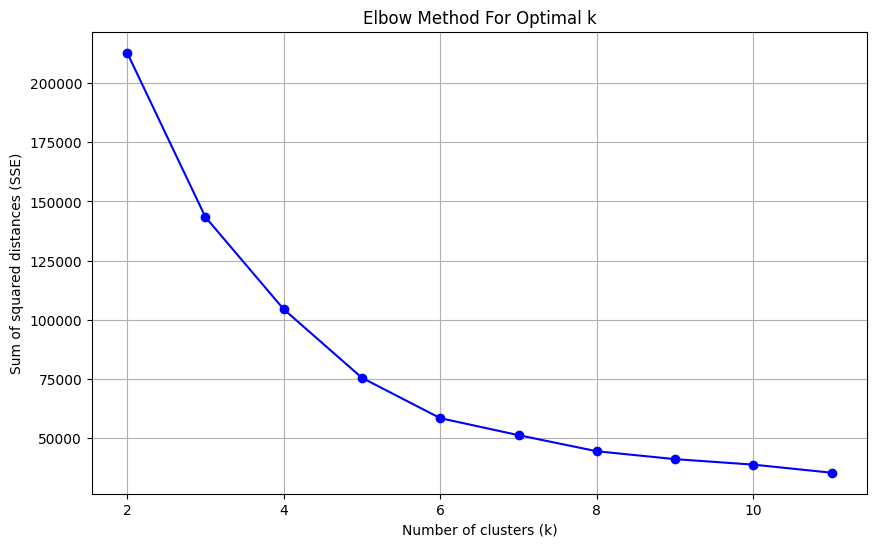

In [23]:
elbow_method(X)

In [24]:
""" 
TODO : 위의 Elbow Method 결과를 바탕으로 최적의 K값을 찾고, 왜 해당 값을 선택했는지 한 문장으로 간략하게! 작성해주세요.
"""

k = 5 # Fill here : 최적의 k 값

"""
K 값 선정 이유
k = 4에서 k = 5로 갈 때 SSE의 감소 폭이 크고, 그 이후로는 감소폭이 완만해지기 때문입니다. 
"""

'\nK 값 선정 이유\nk = 4에서 k = 5로 갈 때 SSE의 감소 폭이 크고, 그 이후로는 감소폭이 완만해지기 때문입니다. \n'

#####  b. Scikit-learn을 활용한 KMeans 클러스터링

In [25]:
# Scikit-learn K-Means 클러스터링

kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(X)

sklearn_labels = kmeans.labels_
sklearn_centroids = kmeans.cluster_centers_

#### (2) K-Means 직접 구현하기

scikit-learn과 같은 외부 라이브러리 없이 파이썬 내장 함수와 라이브러리만으로 K-menas 알고리즘을 직접 구현해봅시다.

In [26]:
from typing import List
import numpy as np

class K_Means:
    def __init__(self, k: int, data: np.ndarray) -> None:
        """
        K_Means 클래스 초기화 함수.
        :param k: 클러스터 수
        :param data: 학습 데이터
        """
        self.k: int = k
        self.data: np.ndarray = data
        self.N: int = len(data)
        self.centroids: np.ndarray = []
        self.cluster: np.ndarray = np.zeros(self.N, dtype=int)
        self._initialize_centroids()

    def _initialize_centroids(self) -> None:
        """
        초기 중심점(centroid)을 데이터 포인트 중 무작위로 선택하는 함수.

        TODO: 중복되지 않은 self.k개의 데이터 포인트를 무작위로 선택하고, 
        이 값들을 self.centroids에 할당하는 코드를 작성해주세요. 

        """
        indices: np.ndarray = np.random.choice(self.N, self.k, replace=False)
        self.centroids = self.data[indices]

    def distance(self, I: np.ndarray, J: np.ndarray) -> float:
        """
        두 데이터 포인트 간의 거리를 계산하는 함수.
        :param I: 첫 번째 데이터 포인트
        :param J: 두 번째 데이터 포인트
        :return: 두 데이터 포인트 간의 거리
        """
        return np.sqrt(np.sum((I - J) ** 2))

    def _assign_clusters(self) -> None:
        """
        각 데이터 포인트를 가장 가까운 중심점에 할당하는 함수

        TODO : 위에서 정의한 distance 함수를 이용해 데이터 포인트와 중심점들 사이의 거리를 계산하고,
        가장 가까운 중심점의 인덱스를 self.Cluser[i]에 할당하는 코드를 작성해주세요.

        """
        for i in range(self.N):
            dist: List[float] = [] # 데이터 포인트와 중심점 사이의 거리를 저장할 리스트
            # Fill here
            for centroid in self.centroids:
                dist.append(self.distance(self.data[i], centroid))
            self.cluster[i] = np.argmin(dist)

    def _update_centroids(self) -> None:
        """
        각 클러스터의 중심점을 업데이트하는 함수

        TODO : 각 클러스터에 속한 데이터 포인트들의 평균을 계산하고, 
        그 결과를 self.centroids의 새로운 중심점으로 업데이트하는 코드를 작성해주세요.

        """
        # 클러스터에 속한 데이터 포인트 저장
        clusters: List[np.ndarray] = [[] for _ in range(self.k)]
        for i in range(self.N):
            clusters[int(self.cluster[i])].append(self.data[i])

        # 새로운 클러스터 중심점 계산
        for i in range(self.k):
            if clusters[i]:
                clusters[i] = np.array(clusters[i])
                # Fill here
                self.centroids[i] = np.mean(clusters[i], axis=0)

    def clustering(self, max_iterations: int = 100) -> np.ndarray:
        """
        K-Means 클러스터링을 수행하는 함수.
        :param max_iterations: 최대 반복 수 (기본값 100)

        TODO : 클러스터링 종료 조건을 설정해주세요. 
        KMeasns 알고리즘은 더이상 군집 상태에 변화가 없을 떄 종료됩니다.

        """
        for _ in range(max_iterations):
            old_cluster: np.ndarray = np.array(self.cluster)
            self._assign_clusters()
            self._update_centroids()
            
            # Fill here
            if np.array_equal(old_cluster, self.cluster):
                break

        return self.cluster


In [27]:
# 직접 만든 K-Means 클러스터링 수행
custom_kmeans = K_Means(k, X)
custom_labels = custom_kmeans.clustering()
custom_centroids = custom_kmeans.centroids

#### (3) 군집화 결과 시각화

군집화 결과를 시각화 해 직접 구현한 K-means와 Scikit-learn에서 제공하는 KMeans의 군집화 결과를 비교해봅시다.

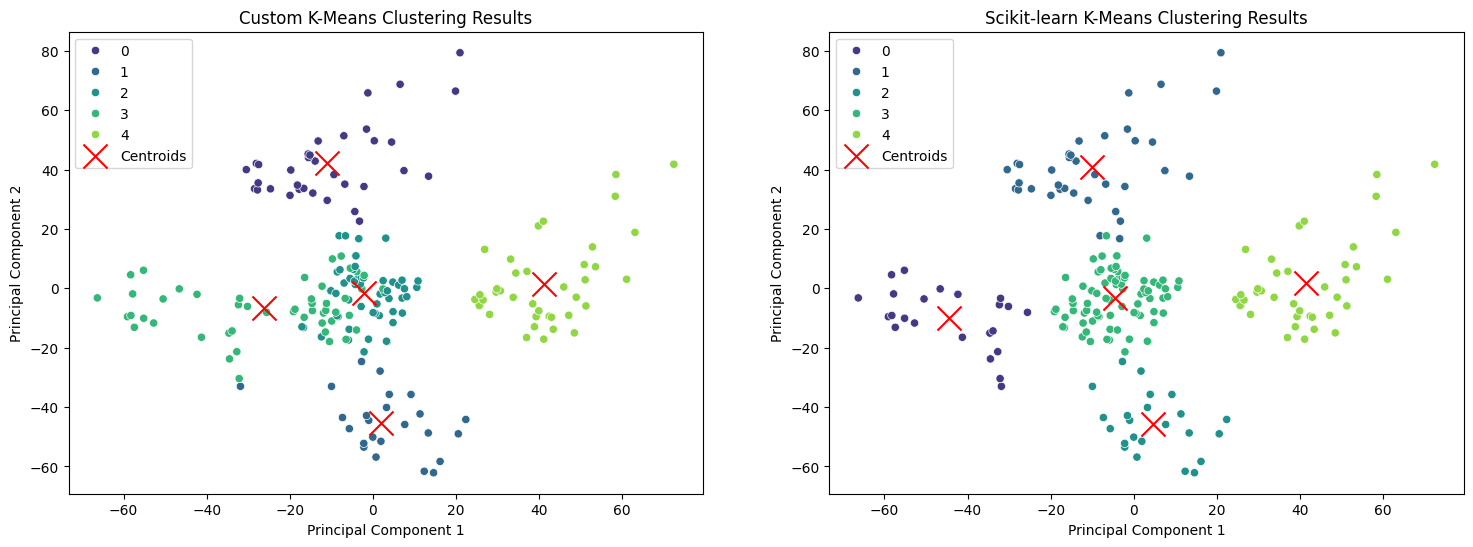

In [28]:
plot_kmeans_comparison(X, custom_labels, custom_centroids,sklearn_labels, sklearn_centroids, k )